<a href="https://colab.research.google.com/github/coulibalymoumouni/Python_seance/blob/main/Pratique_Python_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importation de la bibliotheque
import seaborn as sns
#importation des données
df=sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
# pour afficher les modalités de la variable cut
df['cut'].unique()


['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [3]:
#afficher les modalités de clarity
df['clarity'].unique()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [4]:
#le recodage de la variable cut
from sklearn.preprocessing import LabelEncoder
#initialiser l'encodeur
encoder=LabelEncoder()
#transformer la variable cut je crée une variable cut_encod à partir de cut
df['cut_encod']=encoder.fit_transform(df['cut'])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encod
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1


In [5]:
df['cut_encod'].unique()

array([2, 3, 1, 4, 0])

In [6]:
#on recode la variable color en créant une variable color_encod
df['color_encod']=encoder.fit_transform(df['color'])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encod,color_encod
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,6


In [7]:
df['color_encod'].unique()

array([1, 5, 6, 4, 2, 3, 0])

In [8]:
#recodage de la variable clarity
df['clarity_encod']=encoder.fit_transform(df['clarity'])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encod,color_encod,clarity_encod
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,1,3
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,1,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,1,4
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,5,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,6,3


In [9]:
df['clarity_encod'].unique()

array([3, 2, 4, 5, 7, 6, 0, 1])

In [10]:
#cree un nouveau dataframe pour supprimer les variables textes
df1=df.drop(['cut','color','clarity'],axis=1)
df1.head()

,carat,depth,table,price,x,y,z,cut_encod,color_encod,clarity_encod
0,0.23,61.5,55.0,326,3.95,3.98,2.43,2,1,3
1,0.21,59.8,61.0,326,3.89,3.84,2.31,3,1,2
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,1,4
3,0.29,62.4,58.0,334,4.20,4.23,2.63,3,5,5
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,6,3


In [11]:
#on vérifie les valeurs manquantes
df1.isnull().sum()

,0
carat,0
depth,0
table,0
price,0
x,0
y,0
z,0
cut_encod,0
color_encod,0
clarity_encod,0


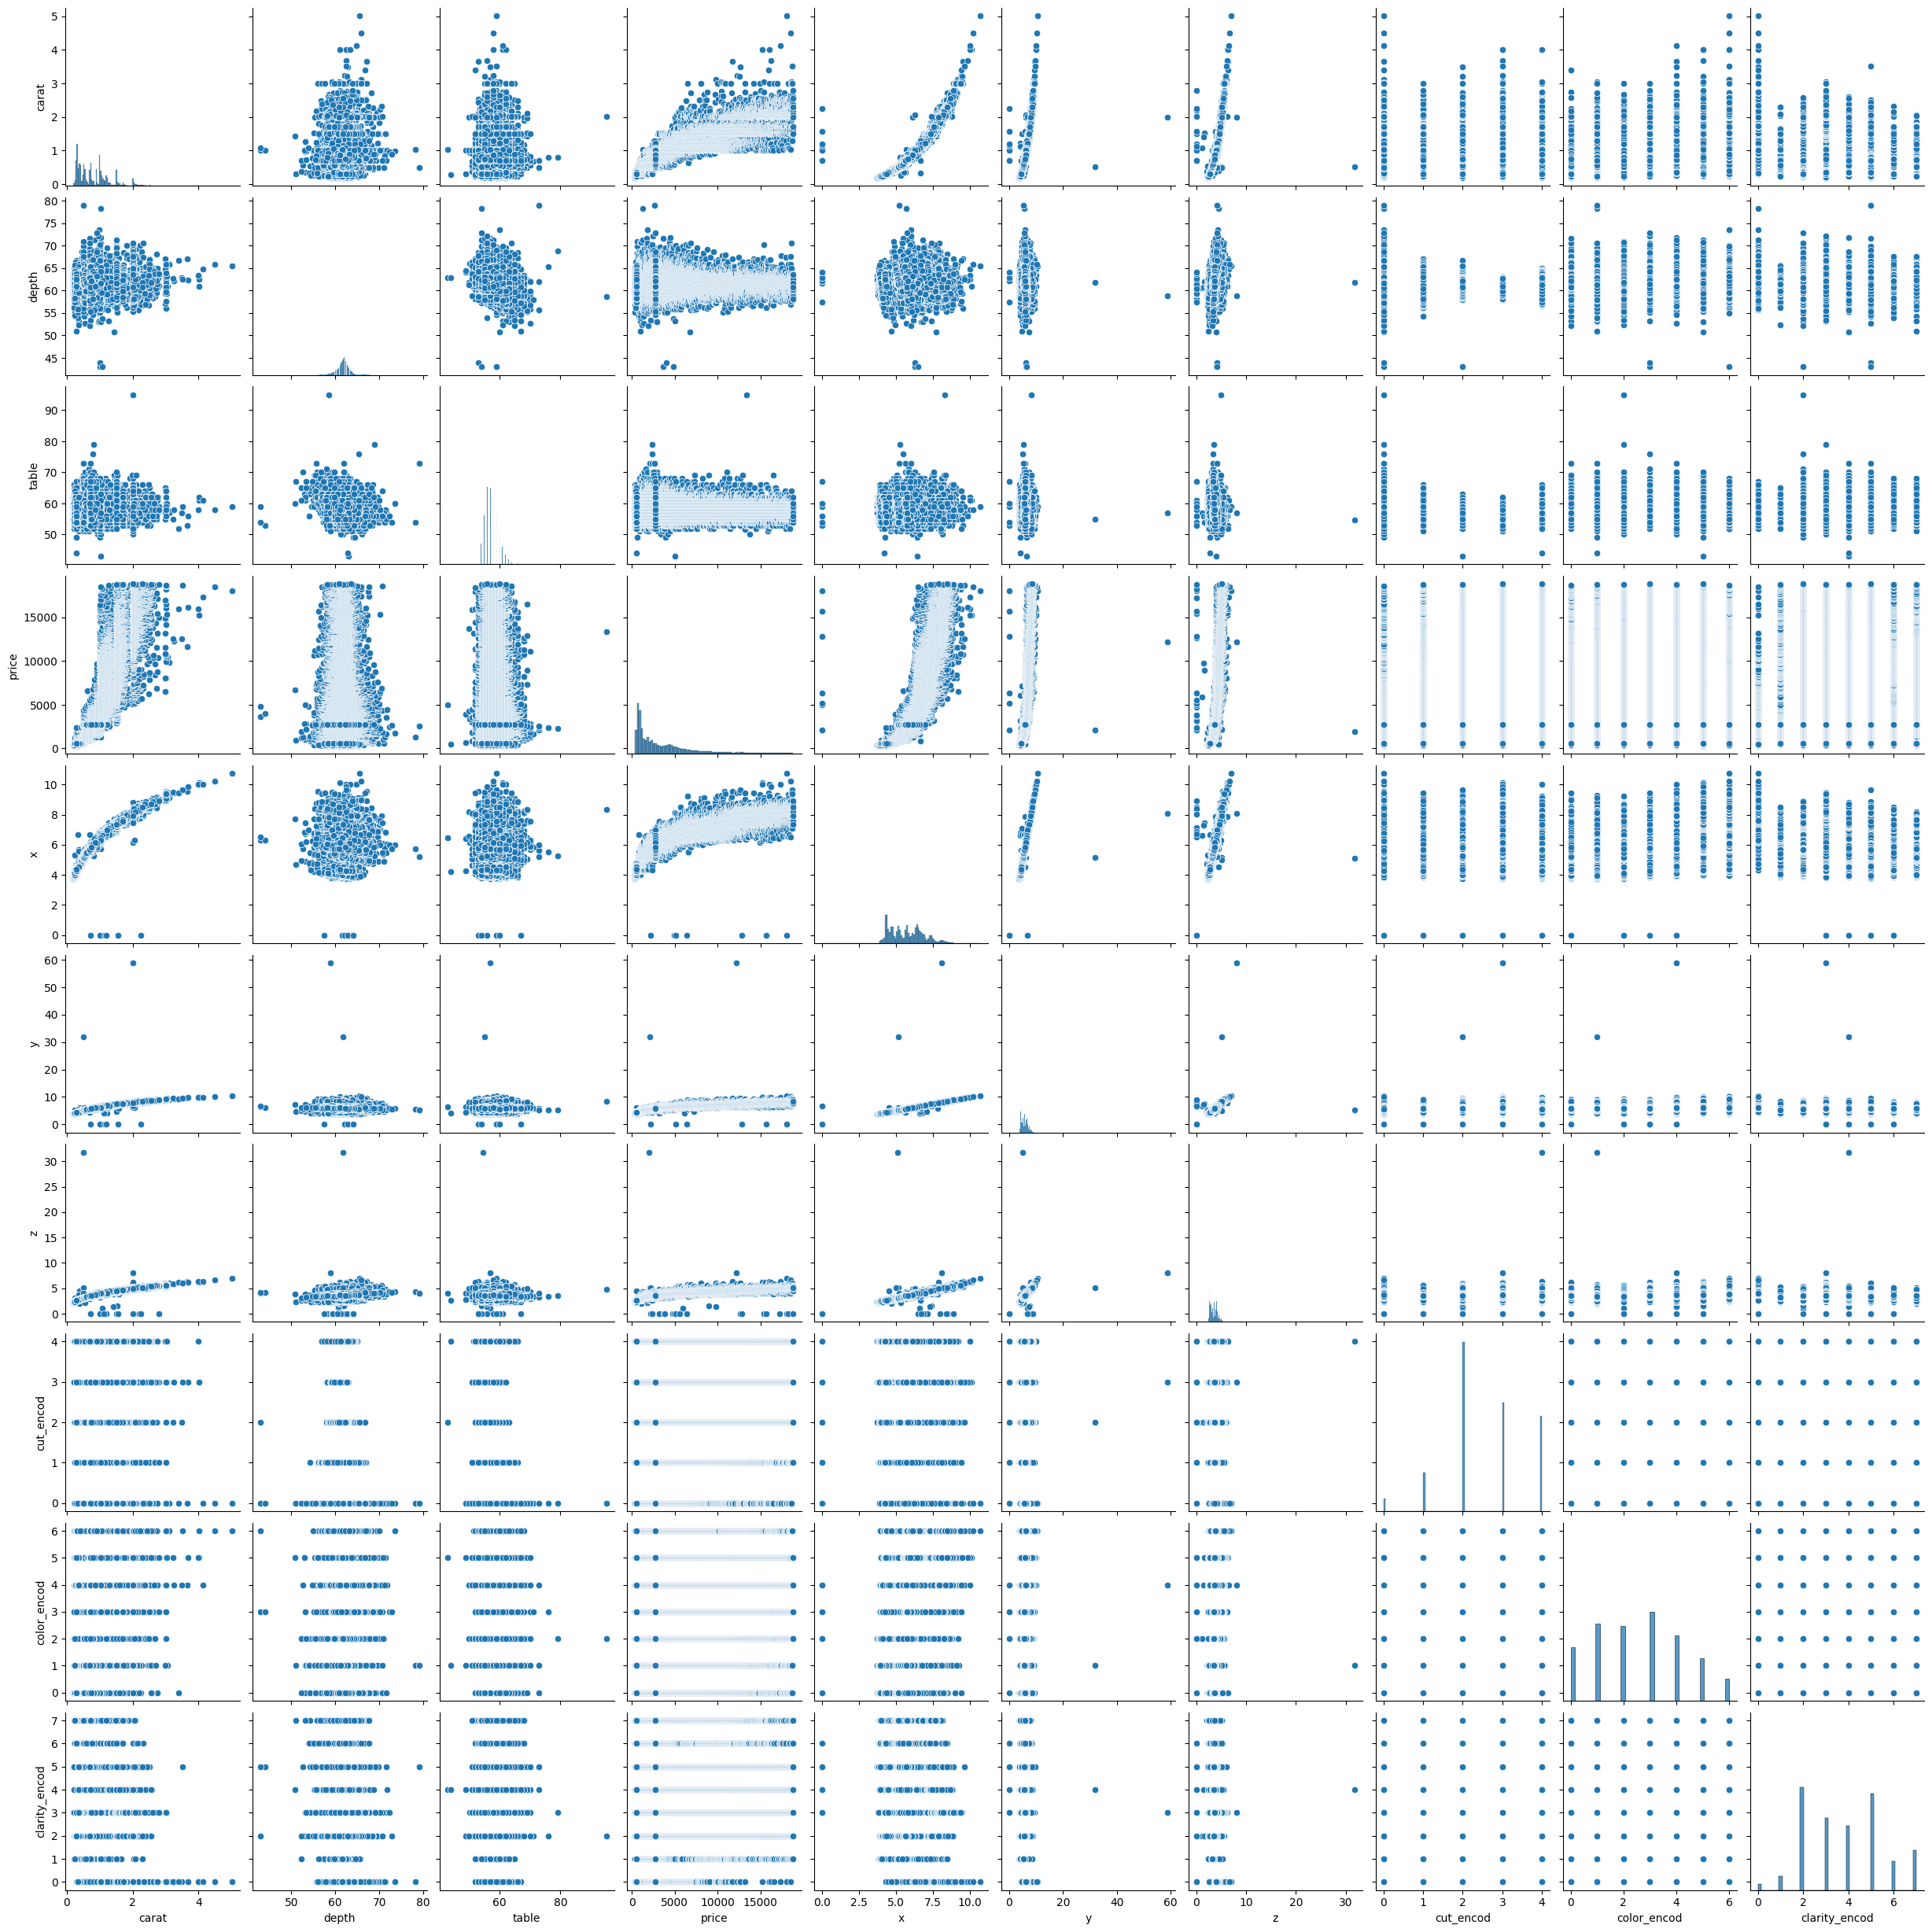

In [12]:

#les graphiques de l'ensemble des variables
sns.pairplot(df1)

<Axes: xlabel='carat', ylabel='x'>

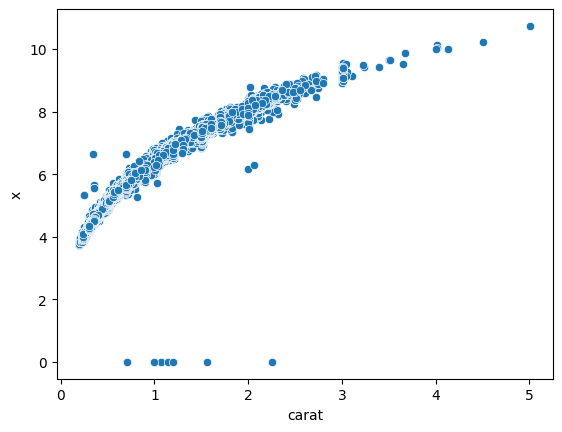

In [13]:
#zommer sur un graphique
sns.scatterplot(x='carat',y='x',data=df1)

In [14]:
#matrice de correlation
df1.corr()

,carat,depth,table,price,x,y,z,cut_encod,color_encod,clarity_encod
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.017124,0.291437,-0.214290
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,-0.194249,0.047279,-0.053080
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.150327,0.026465,-0.088223
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.039860,0.172511,-0.071535
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.022342,0.270287,-0.225721
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.027572,0.263584,-0.217616
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.002037,0.268227,-0.224263
cut_encod,0.017124,-0.194249,0.150327,0.039860,0.022342,0.027572,0.002037,1.000000,0.000304,0.028235
color_encod,0.291437,0.047279,0.026465,0.172511,0.270287,0.263584,0.268227,0.000304,1.000000,-0.027795
clarity_encod,-0.214290,-0.053080,-0.088223,-0.071535,-0.225721,-0.217616,-0.224263,0.028235,-0.027795,1.000000


<Axes: >

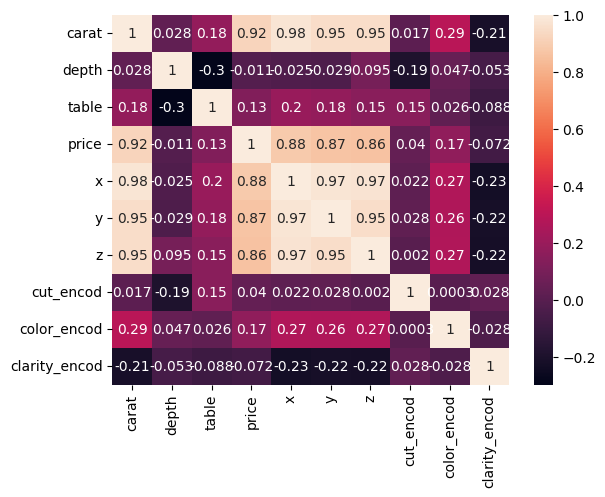

In [15]:
#pour visualiser les corrélations
sns.heatmap(df1.corr(),annot=True)

In [16]:
#transformation min max des données
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
scaler=MinMaxScaler()
df_scaler=scaler.fit_transform(df1)
#transformation de df2 en dataframe
df2=pd.DataFrame(df_scaler,columns=df1.columns)
df2.head()

,carat,depth,table,price,x,y,z,cut_encod,color_encod,clarity_encod
0,0.006237,0.513889,0.230769,0.000000,0.367784,0.067572,0.076415,0.50,0.166667,0.428571
1,0.002079,0.466667,0.346154,0.000000,0.362197,0.065195,0.072642,0.75,0.166667,0.285714
2,0.006237,0.386111,0.423077,0.000054,0.377095,0.069100,0.072642,0.25,0.166667,0.571429
3,0.018711,0.538889,0.288462,0.000433,0.391061,0.071817,0.082704,0.75,0.833333,0.714286
4,0.022869,0.563889,0.288462,0.000487,0.404097,0.073854,0.086478,0.25,1.000000,0.428571


In [17]:
#vérification de la transformation min max
df2.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.1,0.1,0.0,0.0,0.1,0.2,1.0
depth,53940.0,0.5,0.0,0.0,0.5,0.5,0.5,1.0
table,53940.0,0.3,0.0,0.0,0.3,0.3,0.3,1.0
price,53940.0,0.2,0.2,0.0,0.0,0.1,0.3,1.0
x,53940.0,0.5,0.1,0.0,0.4,0.5,0.6,1.0
y,53940.0,0.1,0.0,0.0,0.1,0.1,0.1,1.0
z,53940.0,0.1,0.0,0.0,0.1,0.1,0.1,1.0
cut_encod,53940.0,0.6,0.3,0.0,0.5,0.5,0.8,1.0
color_encod,53940.0,0.4,0.3,0.0,0.2,0.5,0.7,1.0
clarity_encod,53940.0,0.5,0.2,0.0,0.3,0.6,0.7,1.0


In [19]:
#on commence à mettre en place notre kmeans
from sklearn.cluster import KMeans
#on va mettre en place un kmeans de 4 classes
kmeans_test=KMeans(n_clusters=4)
kmeans_test.fit(df2)

KMeans(n_clusters=4)

In [20]:
#prévision des classes pour chaque observation
print(kmeans_test.labels_)

[0 0 0 ... 0 3 0]


In [21]:
#afficher les centroides
print(kmeans_test.cluster_centers_)

[[0.10103746 0.52042147 0.28019114 0.13389703 0.5149584  0.09396765
  0.10741813 0.62537116 0.15087357 0.4088193 ]
 [0.06318789 0.51861536 0.27125922 0.0908808  0.46570045 0.08507831
  0.09707756 0.65076206 0.39111029 0.80727596]
 [0.29466632 0.51792339 0.28586095 0.62410868 0.69664608 0.12701354
  0.1448583  0.68036157 0.56332942 0.55158782]
 [0.1274703  0.52520384 0.27911798 0.15016255 0.543308   0.09903585
  0.1135295  0.61590426 0.7084905  0.40537098]]


In [23]:
#afficher l'inertie
print(kmeans_test.inertia_)

8539.71185945503


In [29]:
#on va faire une boucle sur le k des kmeans
#pour choisir le bon nombre de classe grace a l'inertie
inertie=[]
for k in range(1,15):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df2)
    inertie.append(kmeans.inertia_)
#afficher les inertie de kmeans avec 1 classe jusqu'à 15 classes
print(inertie)

[15023.58689278838, 11672.530353696835, 9937.747004510167, 8539.70577899878, 7383.374809060523, 6661.772624336736, 6150.348258657821, 5630.013810905092, 5417.7237373420485, 5077.122624333623, 4826.467587848213, 4599.60291101187, 4552.963393552383, 4277.141200180676]


<Axes: >

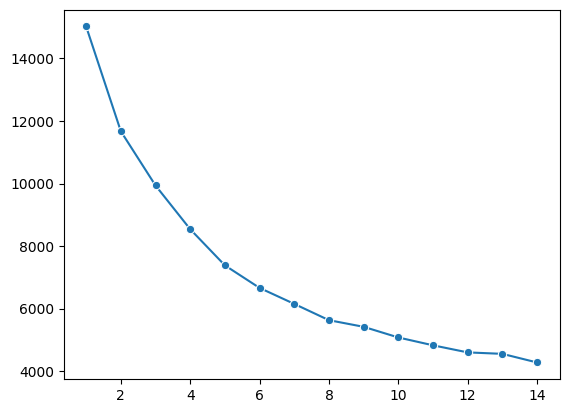

In [30]:
#affichage du diagramme de coude
import matplotlib.pyplot as plt
sns.lineplot(x=list(range(1,15)),y=inertie,marker='o')

In [47]:
#on va opter pour un kmeans de 6,9,12 classes
#a la lecture du diagramme de coude
#je vais lancer mon kmeans_finale
kmeans_6_classes=KMeans(n_clusters=6)
kmeans_9_classes=KMeans(n_clusters=9)
kmeans_12_classes=KMeans(n_clusters=12)
kmeans_6_classes.fit(df2)
kmeans_9_classes.fit(df2)
kmeans_12_classes.fit(df2)


KMeans(n_clusters=12)

In [48]:
#je met les classes dans un dataframe
df_classe6=pd.DataFrame(kmeans_6_classes.labels_,columns=['classe6'])
df_classe9=pd.DataFrame(kmeans_9_classes.labels_,columns=['classe9'])
df_classe12=pd.DataFrame(kmeans_12_classes.labels_,columns=['classe12'])



In [49]:
#je met dans le meme dataframe meme données initiales et les classes
df_classe_donnee=pd.concat([df2,df_classe6],axis=1)
df_classe_donnee1=pd.concat([df_classe_donnee,df_classe9],axis=1)
df_classe_donnee2=pd.concat([df_classe_donnee1,df_classe12],axis=1)
df_classe_donnee2.head()

,carat,depth,table,price,x,y,z,cut_encod,color_encod,clarity_encod,classe6,classe9,classe12
0,0.006237,0.513889,0.230769,0.000000,0.367784,0.067572,0.076415,0.50,0.166667,0.428571,0,3,5
1,0.002079,0.466667,0.346154,0.000000,0.362197,0.065195,0.072642,0.75,0.166667,0.285714,4,6,10
2,0.006237,0.386111,0.423077,0.000054,0.377095,0.069100,0.072642,0.25,0.166667,0.571429,0,3,5
3,0.018711,0.538889,0.288462,0.000433,0.391061,0.071817,0.082704,0.75,0.833333,0.714286,1,5,8
4,0.022869,0.563889,0.288462,0.000487,0.404097,0.073854,0.086478,0.25,1.000000,0.428571,3,8,0


In [50]:
#la ventilation par classe
#il faut que les classes soient de taille pas trop disparatent
df_classe_donnee2['classe6'].value_counts()

,count
classe6,
5,11828
1,9540
0,8988
3,8880
4,8683
2,6021


<Axes: xlabel='classe6', ylabel='carat'>

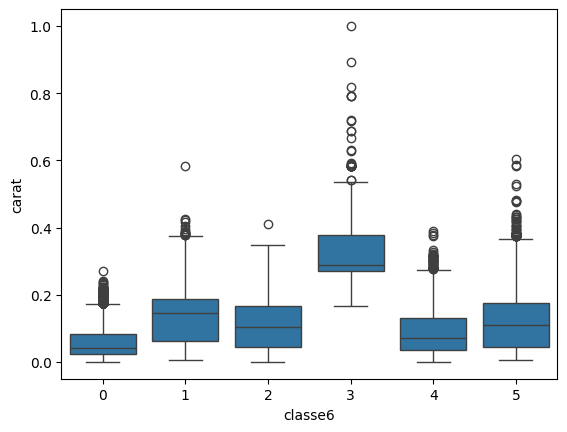

In [45]:
sns.boxplot(x='classe6',y='carat',data=df_classe_donnee2)

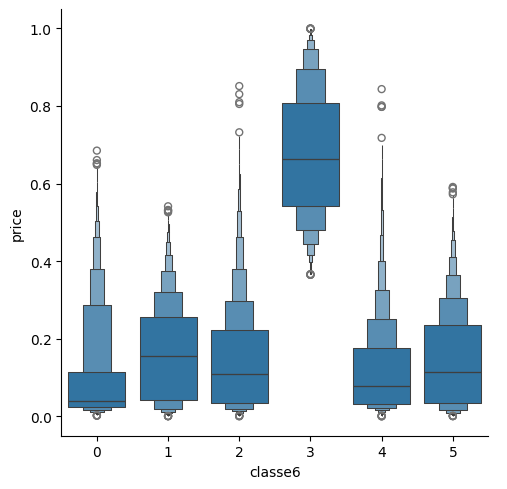

In [46]:
#la classe 2 c'est les diammants à fort price
sns.catplot(x='classe6',y='price',data=df_classe_donnee2,kind='boxen')